# 기상 특성에 따른 안개 발생 진단

## 데이터 설명
- 컬럼

    - `Year` : 년도
    - `Month` : 월
    - `Day` : 일
    - `Time` : 시간 (0 ~ 23)
    - `Minute` : 분 (10분 단위)
    - `STN_ID` : 지점 번호
    - `WS10(deg)` : 10분 평균 풍향, 단위: deg
    - `WS10(m/s)` : 10분 평균 풍속, 단위: m/s
    - `TA` : 1분 평균 기온 10분 주기, 단위: C
    - `RE` : 강수 유무 (0:무강수, 1:강수)
    - `HM` : 1분 평균 상대 습도 10분 주기, 단위: %
    - `sun10` : 1분 일사량 10분단위 합계, 단위: MJ
    - `TS` : 1분 평균 지면온도 10분 주기, 단위: C
    - `VIS1` : 1분 평균 시정 10분 주기, 단위: C (VIS1 변수는 시정 구간을 알 수 있는 변수로 검증 데이터에서는 제외)
    - `class` : 시정 구간

- 시정 계급 기준 (비고: 안개의 기준)

    - `1` : 0 < 시정 < 200
    - `2` : 200 <= 시정 < 500
    - `3` : 500 <= 시정 < 1000
    - `4` : 1000 <= 시정


## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터셋 경로 지정
train_path = "C:/Users/aryij/Downloads/fog_python/fog_train.csv"
test_path = "C:/Users/aryij/Downloads/fog_python/fog_test.csv"

In [3]:
# 데이터셋 불러오기
train_df = pd.read_csv(train_path, index_col=0)
test_df = pd.read_csv(test_path, index_col=0)

In [4]:
train_df.head()

,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
1,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
2,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
3,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
4,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
5,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4


In [5]:
test_df.head()

,fog_test.year,fog_test.month,fog_test.day,fog_test.time,fog_test.minute,fog_test.stn_id,fog_test.ws10_deg,fog_test.ws10_ms,fog_test.ta,fog_test.re,fog_test.hm,fog_test.sun10,fog_test.ts,fog_test.class
1,L,1,1,0,0,AI,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6,NaN
2,L,1,1,0,10,AI,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6,NaN
3,L,1,1,0,20,AI,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7,NaN
4,L,1,1,0,30,AI,323.6,0.7,-2.6,0.0,88.7,0.0,-1.6,NaN
5,L,1,1,0,40,AI,208.4,0.2,-2.6,0.0,89.0,0.0,-1.6,NaN


In [6]:
train_df.shape, test_df.shape

((3156459, 15), (262800, 14))

## 데이터 확인

In [7]:
train_df.describe(include="all")

,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
count,3156459,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3156459,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06
unique,3,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,I,NaN,NaN,NaN,NaN,AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1054060,NaN,NaN,NaN,NaN,157823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.521931e+00,1.573276e+01,1.150007e+01,2.500016e+01,NaN,1.852152e+02,1.999417e+00,1.328812e+01,-4.298995e-01,6.667729e+01,-1.288869e+00,1.282955e+01,1.963548e+04,3.246275e+00
std,NaN,3.448969e+00,8.801320e+00,6.922149e+00,1.707819e+01,NaN,1.072184e+02,4.721616e+00,1.100537e+01,6.929268e+00,2.173623e+01,1.171355e+01,2.257327e+01,1.206407e+04,8.668957e+00
min,NaN,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.900000e+01,-9.900000e+01
25%,NaN,4.000000e+00,8.000000e+00,6.000000e+00,1.000000e+01,NaN,8.470000e+01,9.000000e-01,5.500000e+00,0.000000e+00,5.130000e+01,0.000000e+00,5.100000e+00,1.229700e+04,4.000000e+00
50%,NaN,7.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01,NaN,2.094000e+02,1.800000e+00,1.430000e+01,0.000000e+00,6.870000e+01,0.000000e+00,1.570000e+01,2.000000e+04,4.000000e+00
75%,NaN,1.000000e+01,2.300000e+01,1.800000e+01,4.000000e+01,NaN,2.769000e+02,3.000000e+00,2.200000e+01,0.000000e+00,8.470000e+01,1.600000e-01,2.430000e+01,2.000000e+04,4.000000e+00


In [8]:
test_df.describe(include="all")

,fog_test.year,fog_test.month,fog_test.day,fog_test.time,fog_test.minute,fog_test.stn_id,fog_test.ws10_deg,fog_test.ws10_ms,fog_test.ta,fog_test.re,fog_test.hm,fog_test.sun10,fog_test.ts,fog_test.class
count,262800,262800.000000,262800.000000,262800.0000,262800.000000,262800,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000,2694.0
unique,1,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,L,NaN,NaN,NaN,NaN,AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,262800,NaN,NaN,NaN,NaN,52560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.526027,15.720548,11.5000,25.000000,NaN,196.658506,2.209763,13.762124,-1.659824,66.988850,0.057753,12.861969,-99.0
std,NaN,3.447858,8.796264,6.9222,17.078284,NaN,102.654641,3.479083,10.731883,12.973129,21.925011,2.097243,22.992859,0.0
min,NaN,1.000000,1.000000,0.0000,0.000000,NaN,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000,-99.0
25%,NaN,4.000000,8.000000,5.7500,10.000000,NaN,108.900000,1.000000,5.600000,0.000000,51.100000,0.000000,4.600000,-99.0
50%,NaN,7.000000,16.000000,11.5000,25.000000,NaN,220.400000,2.000000,15.100000,0.000000,69.300000,0.000000,15.900000,-99.0
75%,NaN,10.000000,23.000000,17.2500,40.000000,NaN,287.100000,3.100000,22.600000,0.000000,86.100000,0.170000,24.500000,-99.0


In [10]:
# train_df 컬럼들 앞에 있는 fog_train. <- 제거
train_df.columns = train_df.columns.str.replace("fog_train.", "")

In [27]:
# test_df 컬럼들 앞에 있는 fog_train. <- 제거
test_df.columns = test_df.columns.str.replace("fog_test.", "")

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3156459 entries, 1 to 3156459
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      object 
 1   month     int64  
 2   day       int64  
 3   time      int64  
 4   minute    int64  
 5   stn_id    object 
 6   ws10_deg  float64
 7   ws10_ms   float64
 8   ta        float64
 9   re        float64
 10  hm        float64
 11  sun10     float64
 12  ts        float64
 13  vis1      int64  
 14  class     int64  
dtypes: float64(7), int64(6), object(2)
memory usage: 385.3+ MB


In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262800 entries, 1 to 262800
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   year      262800 non-null  object 
 1   month     262800 non-null  int64  
 2   day       262800 non-null  int64  
 3   time      262800 non-null  int64  
 4   minute    262800 non-null  int64  
 5   stn_id    262800 non-null  object 
 6   ws10_deg  262800 non-null  float64
 7   ws10_ms   262800 non-null  float64
 8   ta        262800 non-null  float64
 9   re        262800 non-null  float64
 10  hm        262800 non-null  float64
 11  sun10     262800 non-null  float64
 12  ts        262800 non-null  float64
 13  class     2694 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.1+ MB


In [30]:
# 결측치 확인
train_df.isnull().sum()

year        0
month       0
day         0
time        0
minute      0
stn_id      0
ws10_deg    0
ws10_ms     0
ta          0
re          0
hm          0
sun10       0
ts          0
vis1        0
class       0
dtype: int64

In [31]:
test_df.isnull().sum()

year             0
month            0
day              0
time             0
minute           0
stn_id           0
ws10_deg         0
ws10_ms          0
ta               0
re               0
hm               0
sun10            0
ts               0
class       260106
dtype: int64

In [13]:
train_df["year"].unique()

array(['I', 'J', 'K'], dtype=object)

In [14]:
train_df["stn_id"].unique()

array(['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'BA', 'BB', 'BC',
       'BD', 'CA', 'CB', 'DA', 'DB', 'DC', 'EA', 'EB', 'EC'], dtype=object)

In [15]:
train_df["class"].unique()

array([  4,   1,   3,   2, -99], dtype=int64)

In [32]:
test_df["year"].unique()

array(['L'], dtype=object)

In [33]:
test_df["stn_id"].unique()

array(['AI', 'BE', 'CC', 'DD', 'ED'], dtype=object)

In [34]:
test_df["class"].unique()

array([ nan, -99.])

In [16]:
# class 원래 범위 1 ~ 4, 그러나 -99가 존재
# -99가 뭔지 확인해본다
train_df[train_df["class"]==-99].head()

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
7646,I,2,23,2,20,AA,272.0,1.3,-0.9,0.0,61.1,0.00,-1.0,-99,-99
7781,I,2,24,0,50,AA,140.7,1.2,2.1,0.0,59.5,0.00,0.8,-99,-99
16054,I,4,21,11,40,AA,271.7,7.0,9.2,0.0,42.8,0.32,16.7,-99,-99
16055,I,4,21,11,50,AA,276.4,6.0,9.3,0.0,43.4,0.26,19.0,-99,-99
16056,I,4,21,12,0,AA,268.4,5.9,9.5,0.0,41.7,0.48,21.1,-99,-99


In [17]:
# class = -99인 데이터의 year, month, stn_id, vis1 컬럼 확인
print(sorted(train_df[train_df["class"]==-99]["year"].unique()))
print(sorted(train_df[train_df["class"]==-99]["month"].unique()))
print(sorted(train_df[train_df["class"]==-99]["stn_id"].unique()))
print(sorted(train_df[train_df["class"]==-99]["vis1"].unique()))

['I', 'J', 'K']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'BA', 'BB', 'BC', 'BD', 'CA', 'CB', 'DA', 'DB', 'DC', 'EA', 'EB', 'EC']
[-99]


In [36]:
print(sorted(test_df[test_df["class"]==-99]["year"].unique()))
print(sorted(test_df[test_df["class"]==-99]["month"].unique()))
print(sorted(test_df[test_df["class"]==-99]["stn_id"].unique()))
# print(sorted(test_df[test_df["class"]==-99]["vis1"].unique()))

['L']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
['AI', 'BE', 'CC', 'DD', 'ED']


### class = -99인 데이터 비율

In [18]:
# class = -99인 것 count
class_99_cnt = train_df[train_df["class"]==-99].count()
total_cnt = train_df.count()
class_99_pct = round((class_99_cnt/total_cnt)*100, 1)

In [19]:
pct_99 = pd.concat([class_99_cnt, class_99_pct], axis=1, keys=["class_99", "Percent"])
pct_99

,class_99,Percent
year,22516,0.7
month,22516,0.7
day,22516,0.7
time,22516,0.7
minute,22516,0.7
stn_id,22516,0.7
ws10_deg,22516,0.7
ws10_ms,22516,0.7
ta,22516,0.7
re,22516,0.7


In [20]:
cnt_99 = train_df[train_df["class"]==-99].shape[0]
pct_99 = round((cnt_99/train_df.shape[0])*100, 2)

In [21]:
class_99_df = pd.DataFrame({"cnts" : [cnt_99], "percent" : [pct_99]}, index=["class_99"])
class_99_df

,cnts,percent
class_99,22516,0.71


## EDA
- `stn_id` : A, B, C, D, E로 바꾸자
- `class` : -99 -> 결측치

In [39]:
train_df.head()

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
1,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
2,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
3,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
4,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
5,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4


In [40]:
test_df.head()

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,class
1,L,1,1,0,0,AI,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6,NaN
2,L,1,1,0,10,AI,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6,NaN
3,L,1,1,0,20,AI,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7,NaN
4,L,1,1,0,30,AI,323.6,0.7,-2.6,0.0,88.7,0.0,-1.6,NaN
5,L,1,1,0,40,AI,208.4,0.2,-2.6,0.0,89.0,0.0,-1.6,NaN


In [ ]:
train_df["mod_stn_id"]

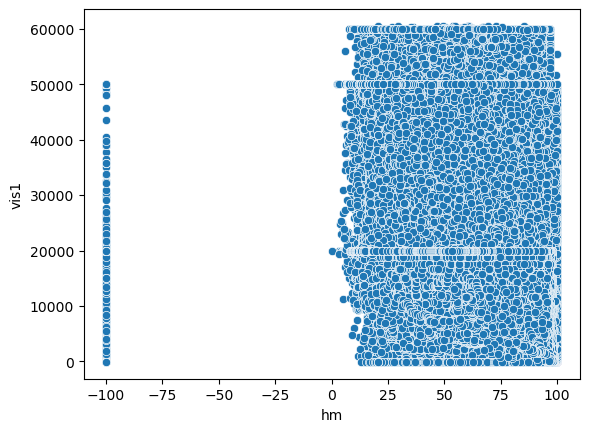

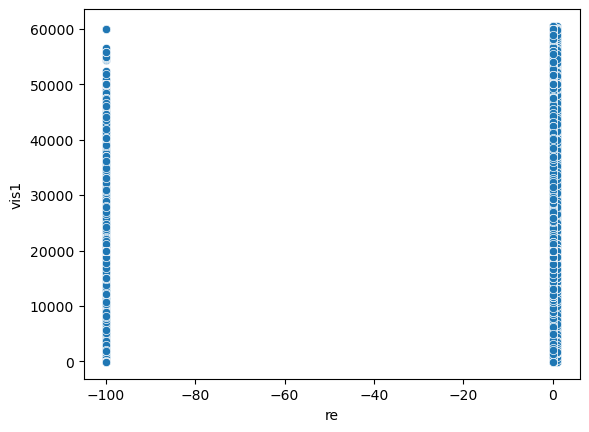

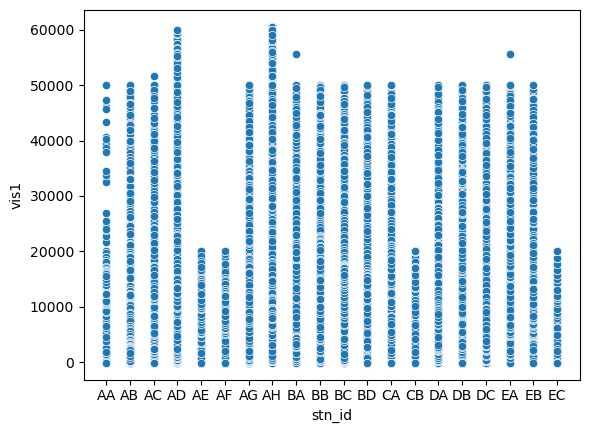

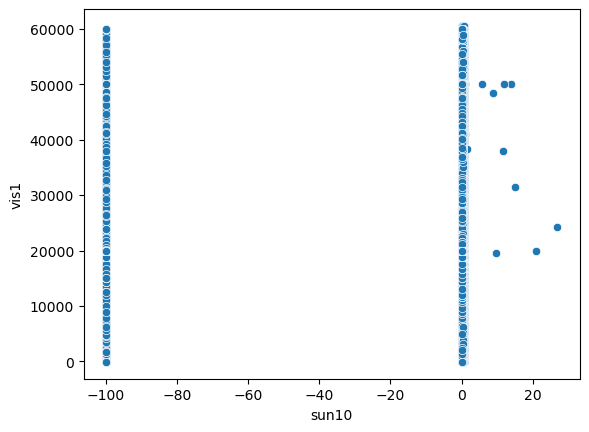

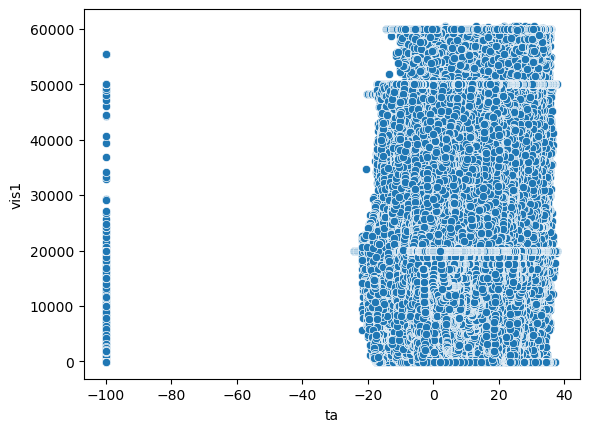

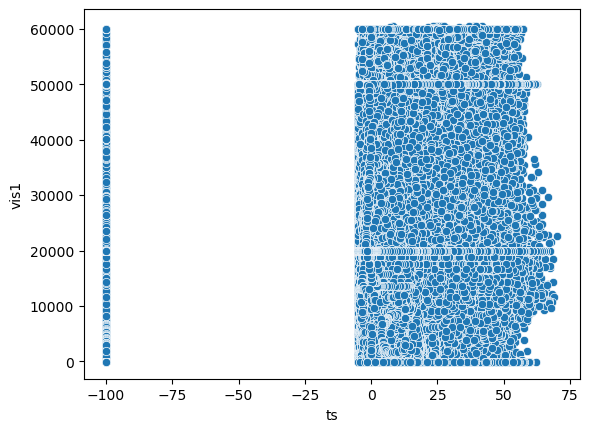

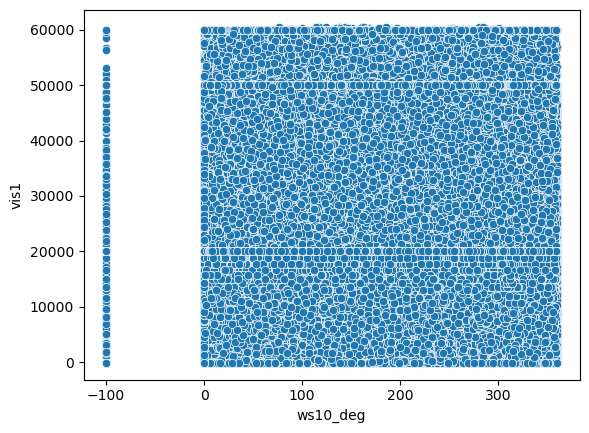

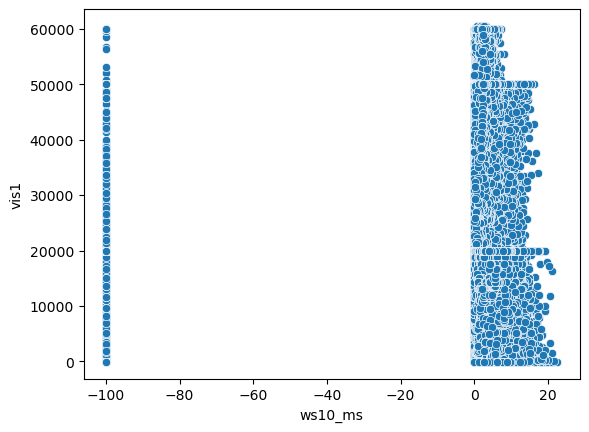

In [41]:

coef_columns=train_df.columns.difference(["year", "month", "day","time","minute","fog_test.stn_id","vis1","class","Unnamed: 0"])

for col in coef_columns : 
    sns.scatterplot(data=train_df, x=col, y='vis1')
    plt.show()

In [46]:
train_df['vis1'].max()

60525

In [49]:
train_df.groupby(["stn_id"])["vis1"].max()

stn_id
AA    50000
AB    50100
AC    51639
AD    60000
AE    20000
AF    20000
AG    50000
AH    60525
BA    55537
BB    50000
BC    50000
BD    50000
CA    50000
CB    20000
DA    50000
DB    50000
DC    50100
EA    55537
EB    50000
EC    20000
Name: vis1, dtype: int64

In [50]:
train_df.groupby(["stn_id"])["vis1"].min()

stn_id
AA   -99
AB   -99
AC   -99
AD   -99
AE   -99
AF   -99
AG   -99
AH   -99
BA   -99
BB   -99
BC   -99
BD   -99
CA   -99
CB   -99
DA   -99
DB   -99
DC   -99
EA   -99
EB   -99
EC   -99
Name: vis1, dtype: int64

In [52]:
train_df[train_df.vis1 >=0].groupby(["stn_id"])["vis1"].min()

stn_id
AA      1
AB     20
AC     88
AD      4
AE     30
AF     87
AG     11
AH     10
BA     26
BB     62
BC     80
BD     17
CA     17
CB    178
DA      8
DB     10
DC     18
EA     10
EB     52
EC      4
Name: vis1, dtype: int64

In [53]:
train_df["class"].value_counts(normalize=True)

class
 4     0.982686
-99    0.007133
 3     0.003859
 2     0.003830
 1     0.002492
Name: proportion, dtype: float64

In [54]:
num_cols = train_df.describe().columns
train_df[num_cols]

,month,day,time,minute,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
1,1,1,0,10,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
2,1,1,0,20,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
3,1,1,0,30,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
4,1,1,0,40,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
5,1,1,0,50,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156455,12,31,23,10,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000,4
3156456,12,31,23,20,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000,4
3156457,12,31,23,30,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000,4
3156458,12,31,23,40,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000,4


In [56]:
train_df[num_cols].corr()["vis1"]

month       0.093304
day         0.005642
time        0.099277
minute     -0.000199
ws10_deg    0.039577
ws10_ms     0.079298
ta          0.065679
re          0.015967
hm         -0.323327
sun10      -0.059566
ts          0.041993
vis1        1.000000
class       0.142147
Name: vis1, dtype: float64

In [57]:
train_df[train_df.vis1<20000]

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
10,I,1,1,1,40,AA,29.8,0.1,-5.7,0.0,41.4,0.0,-2.5,18510,4
14,I,1,1,2,20,AA,38.5,0.1,-5.5,0.0,43.6,0.0,-2.6,18971,4
19,I,1,1,3,10,AA,40.8,0.0,-5.6,0.0,46.3,0.0,-2.6,19165,4
34,I,1,1,5,40,AA,-99.9,-99.9,-5.0,0.0,56.5,0.0,-2.1,18219,4
35,I,1,1,5,50,AA,-99.9,-99.9,-4.9,0.0,57.3,0.0,-2.1,17846,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156308,K,12,30,22,40,EC,289.8,4.2,2.3,0.0,56.6,0.0,-0.9,17647,4
3156309,K,12,30,22,50,EC,271.7,2.7,2.2,0.0,56.9,0.0,-1.2,18750,4
3156310,K,12,30,23,0,EC,275.7,2.7,2.1,0.0,57.0,0.0,-1.5,-99,-99
3156311,K,12,30,23,10,EC,283.6,2.5,1.9,0.0,57.2,0.0,-1.5,18750,4


In [58]:
1427376 / train_df.shape[0]

0.4522079963655476